# The aim of this notebook is to generate curves from the log.txt files:

A few imports to begin with

In [1]:
import os

In [2]:
import matplotlib.pyplot as plt

First, to collect all the information from a log file, we define the following function:

In [3]:
def ppl_from_log(path_to_log):
    train_ppl = []
    val_ppl = []
    wall_clock = [0]
    with open(path_to_log) as f:
        for line in f:
            line_split = line.split('\t')
            train_ppl.append(float(line_split[1].split()[-1]))
            val_ppl.append(float(line_split[2].split()[-1]))
            best_ppl = float(line_split[3].split()[-1])
            wall_clock.append(float(line_split[4].split()[-1])+wall_clock[-1])
    return train_ppl, val_ppl, best_ppl, wall_clock[1:]

Now we can focus on drawing the curves:

In [4]:
result_path = r'C:\Users\Antoine CHEHIRE\Documents\GitHub\Deep_1_AC_AN_PW\Assignment2\Results'

We can list all the experiments:

In [5]:
for exp in os.listdir(result_path):
    if not os.path.isdir(os.path.join(result_path, exp)):
        continue
    print(exp)

g1_gru_adam
g2_gru_sched
g3_gru_sgd
r1_rnn_adam
r2_rnn_sched
r3_rnn_sgd
r4_rnn_adam_hyp1
r5_rnn_adam_hyp2
r6_rnn_adam_hyp3
t1_Transfo_adam
t2_Transfo_sched
t3_Transfo_sgd
t4_Transfo_sched_hyp1
t5_Transfo_sched_hyp2
t6_Transfo_sched_hyp3


Now we can plot the right curves:

## For each experimentin 1-3, plot learning curves(train and validation) of PPL over both epochs and wall-clock-time

In [6]:
def pretty_plot_log(train_ppl, val_ppl, wall_clock, exp=None):
    exp_label = '_'+exp if exp is not None else ''
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(train_ppl, label='train_ppl'+exp_label)
    plt.plot(val_ppl, label='val_ppl'+exp_label)
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(wall_clock, train_ppl, label='train_ppl'+exp_label)
    plt.plot(wall_clock, val_ppl, label='val_ppl'+exp_label)
    plt.xlabel('wall clock in s')
    plt.legend()

g1_gru_adam


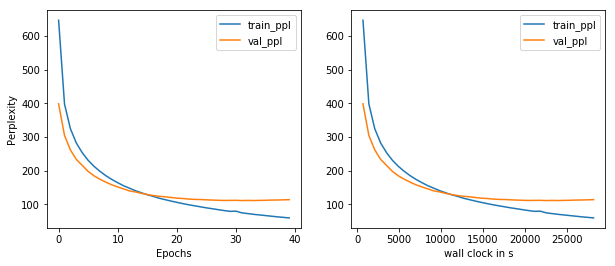

g2_gru_sched


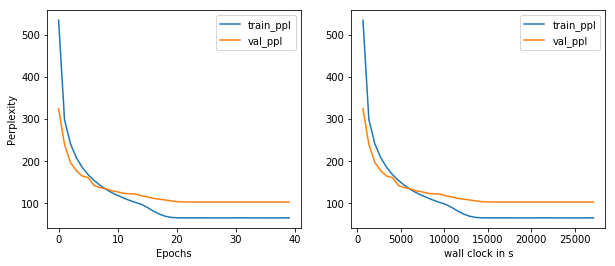

g3_gru_sgd


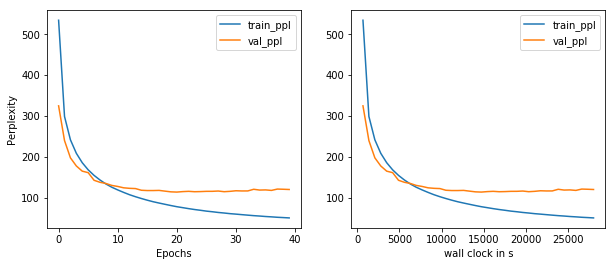

r1_rnn_adam


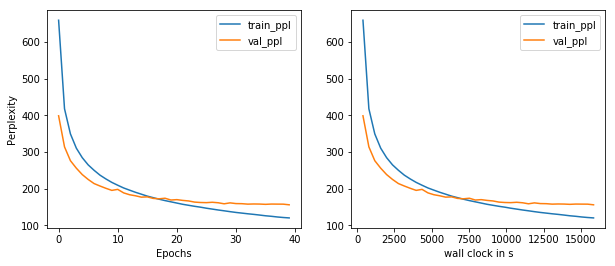

r2_rnn_sched


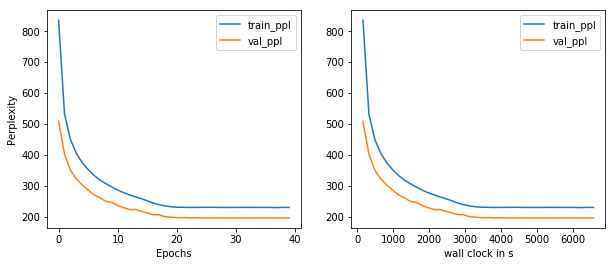

r3_rnn_sgd


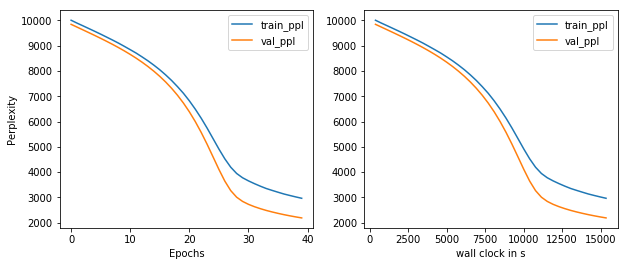

r4_rnn_adam_hyp1


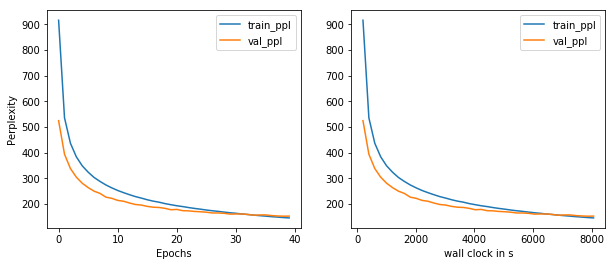

r5_rnn_adam_hyp2


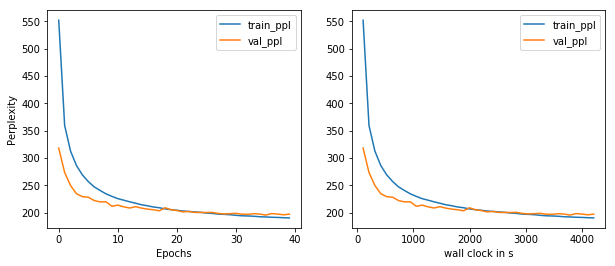

r6_rnn_adam_hyp3


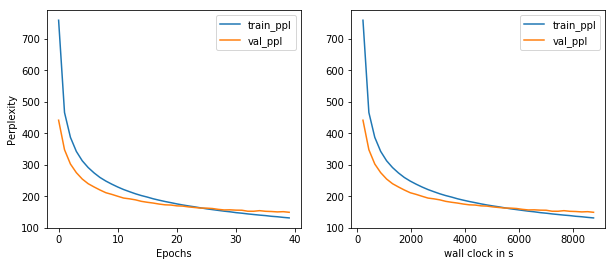

t1_Transfo_adam


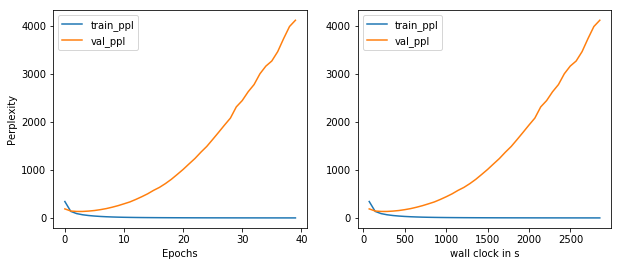

t2_Transfo_sched


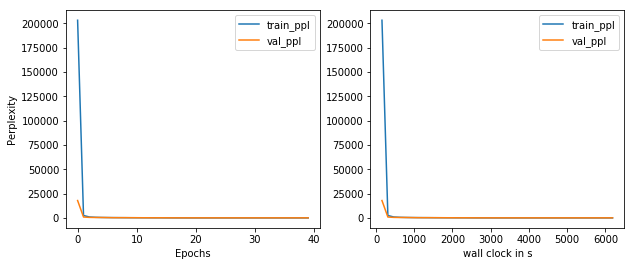

t3_Transfo_sgd


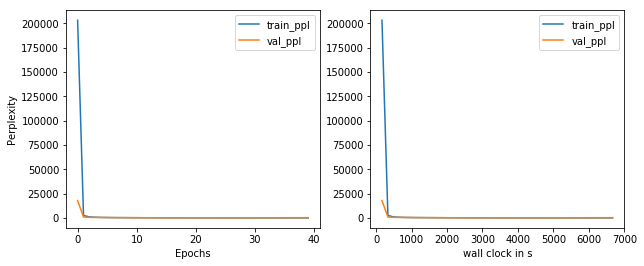

t4_Transfo_sched_hyp1


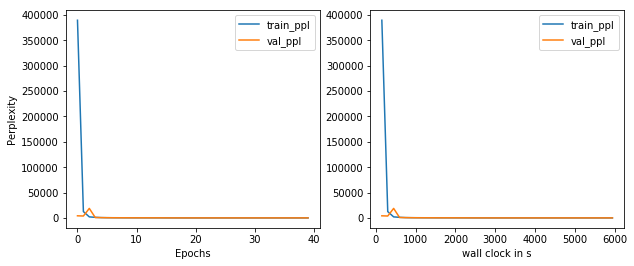

t5_Transfo_sched_hyp2


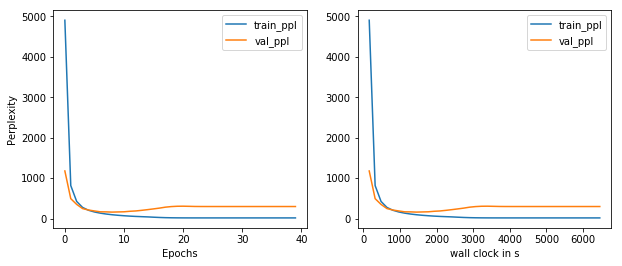

t6_Transfo_sched_hyp3


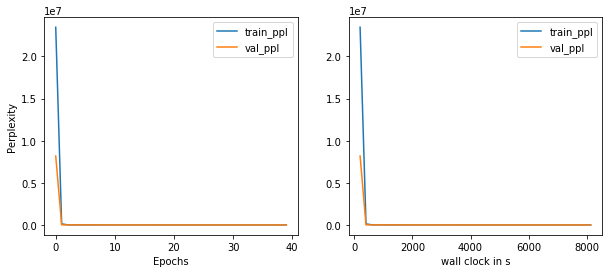

In [7]:
for exp in os.listdir(result_path):
    if not os.path.isdir(os.path.join(result_path, exp)):
        continue
    print(exp)
    train_ppl, val_ppl, best_ppl, wall_clock = ppl_from_log(os.path.join(result_path, exp, 'log.txt'))
    pretty_plot_log(train_ppl, val_ppl, wall_clock)
    plt.show()

## Make a table of results summarizing the train and validation performace for each experiment,indicating the architecture and optimizer.  Sort by architecture, then optimizer, and numberthe experiments to refer to them easily later.  Bold the best result for each architecture.

In [8]:
import pandas as pd
import numpy as np

In [9]:
names = []
train = []
val = []
for exp in os.listdir(result_path):
    if not os.path.isdir(os.path.join(result_path, exp)):
        continue
    train_ppl, val_ppl, best_ppl, wall_clock = ppl_from_log(os.path.join(result_path, exp, 'log.txt'))
    names.append(exp)
    train.append(train_ppl[-1])
    val.append(best_ppl)
table = pd.DataFrame(np.array([train, val]).T)
table.columns = ['train ppl', 'val ppl']
table.index = names
table

,train ppl,val ppl
g1_gru_adam,59.647853,111.189451
g2_gru_sched,65.529018,103.060566
g3_gru_sgd,50.122979,113.393710
r1_rnn_adam,120.624634,156.353345
r2_rnn_sched,229.782392,195.875238
r3_rnn_sgd,2965.429086,2188.200816
r4_rnn_adam_hyp1,145.476422,152.216474
r5_rnn_adam_hyp2,190.690188,195.863409
r6_rnn_adam_hyp3,131.543535,149.369938
t1_Transfo_adam,3.415881,138.150893


Export to excel

In [10]:
with pd.ExcelWriter(os.path.join(result_path, "table_2.xlsx")) as writer:
    table.to_excel(writer)

## List all of the hyperparameters for each experiment in your report (e.g.  specify the commandyou run in the terminal to launch the job, including the command line arguments)

In [11]:
for exp in os.listdir(result_path):
    if not os.path.isdir(os.path.join(result_path, exp)):
        continue
    with open(os.path.join(result_path, exp, 'exp_config.txt')) as f:
        for line in f:
            name, val = line.split('    ')
            if name=="save_dir":
                info = val.split('=')
                string_to_print = exp.split('_')[0]+': '+info[0].split('_')[-1]
                for inf in info[1:-1]:
                    splinf = inf.split('_')
                    if (splinf[0], splinf[1]) == ('SGD', 'LR'):
                        string_to_print += '='+' '.join(splinf[:3])+ '; '
                        string_to_print += ' '.join(splinf[3:])
                    else:
                        string_to_print += '='+splinf[0]+ '; '
                        string_to_print += ' '.join(splinf[1:])
                print(';'.join(string_to_print.split(';')[:-1]))

g1: model=GRU; optimizer=ADAM; initial lr=0.0001; batch size=20; seq len=35; hidden size=1500; num layers=2; dp keep prob=0.35
g2: model=GRU; optimizer=SGD LR SCHEDULE; initial lr=10; batch size=20; seq len=35; hidden size=1500; num layers=2; dp keep prob=0.35
g3: model=GRU; optimizer=SGD; initial lr=10; batch size=20; seq len=35; hidden size=1500; num layers=2; dp keep prob=0.35
r1: model=RNN; optimizer=ADAM; initial lr=0.0001; batch size=20; seq len=35; hidden size=1500; num layers=2; dp keep prob=0.35
r2: model=RNN; optimizer=SGD LR SCHEDULE; initial lr=1; batch size=20; seq len=35; hidden size=512; num layers=2; dp keep prob=0.35
r3: model=RNN; optimizer=SGD; initial lr=0.0001; batch size=20; seq len=35; hidden size=1500; num layers=2; dp keep prob=0.35
r4: model=RNN; optimizer=ADAM; initial lr=0.0001; batch size=100; seq len=35; hidden size=2000; num layers=2; dp keep prob=0.35
r5: model=RNN; optimizer=ADAM; initial lr=0.001; batch size=40; seq len=35; hidden size=512; num layers=

## Make 2 plots for each optimizer; one which has all of the validation curves for that optimizer overepochs and one overwall-clock-time

## Make 2 plots for each arcitecture; one which has all of the validation curves for that architec-ture over epochs and one overwall-clock-time.

In both cases, we need to sort the data:

In [12]:
by_optim = {'SGD':[[],[],[],[]], 'ADAM':[[],[],[],[]], 'SGD LR SCHEDULE': [[],[],[],[]]}
by_archi = {'RNN':[[],[],[],[]], 'GRU':[[],[],[],[]], 'TRANSFORMER': [[],[],[],[]]}
for exp in os.listdir(result_path):
    if not os.path.isdir(os.path.join(result_path, exp)):
        continue
    train_ppl, val_ppl, best_ppl, wall_clock = ppl_from_log(os.path.join(result_path, exp, 'log.txt'))
    with open(os.path.join(result_path, exp, 'exp_config.txt')) as f:
        for line in f:
            name, val = line.split('    ')
            if name=="save_dir":
                info = val.split('=')
                model = info[1].split('_')[0]
                if len(info[2].split('_'))==3:
                    optim = info[2].split('_')[0]
                else:
                    optim = 'SGD LR SCHEDULE'
                by_optim[optim][0].append(train_ppl)
                by_optim[optim][1].append(val_ppl)
                by_optim[optim][2].append(wall_clock)
                by_optim[optim][3].append(exp.split('_')[0])
                
                by_archi[model][0].append(train_ppl)
                by_archi[model][1].append(val_ppl)
                by_archi[model][2].append(wall_clock)
                by_archi[model][3].append(exp.split('_')[0])

First, let's draw by optim:

In [17]:
def pretty_plot_log_list(train_ppls, val_ppls, wall_clocks, exps):
    color_list = [(1,0,0), (0,1,0), (0,0,1), (0,0,0), (1,1,0)]
    plt.figure(figsize=(10,4))
    plt.subplot(1,2,1)
    for train_ppl, val_ppl, exp, c in zip(train_ppls, val_ppls, exps, color_list):
        exp_label = '_'+exp if exp is not None else ''
        plt.plot(train_ppl, color=c, linestyle='dashed', label='train_ppl'+exp_label)
        plt.plot(val_ppl, color=c, label='val_ppl'+exp_label)
    plt.xlabel('Epochs')
    plt.ylabel('Perplexity')
    plt.legend()
    
    plt.subplot(1,2,2)
    for train_ppl, val_ppl, wall_clock, exp, c in zip(train_ppls, val_ppls, wall_clocks, exps, color_list):
        exp_label = '_'+exp if exp is not None else ''
        plt.plot(wall_clock, train_ppl, color=c, linestyle='dashed', label='train_ppl'+exp_label)
        plt.plot(wall_clock, val_ppl, color=c, label='val_ppl'+exp_label)
    plt.xlabel('wall clock in s')
    plt.legend()
    plt.show()

SGD


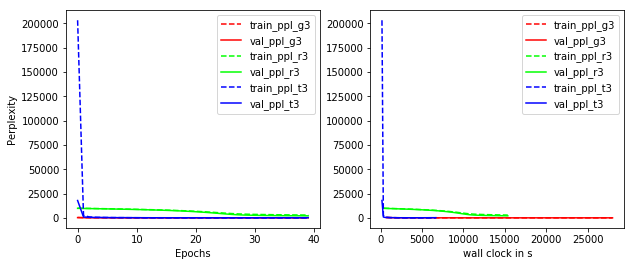

SGD LR SCHEDULE


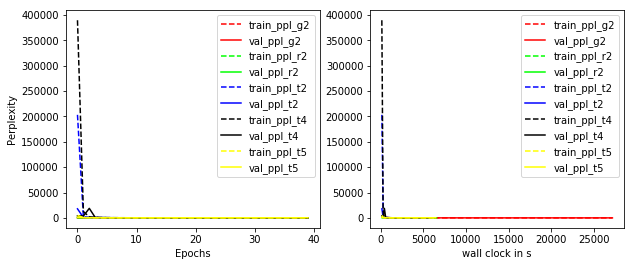

ADAM


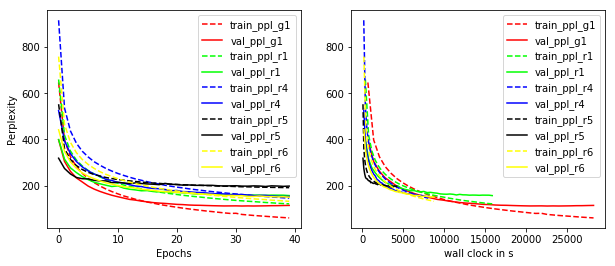

In [18]:
for key in ['SGD', 'SGD LR SCHEDULE', 'ADAM']:
    print(key)
    pretty_plot_log_list(*by_optim[key])

By architecture

RNN


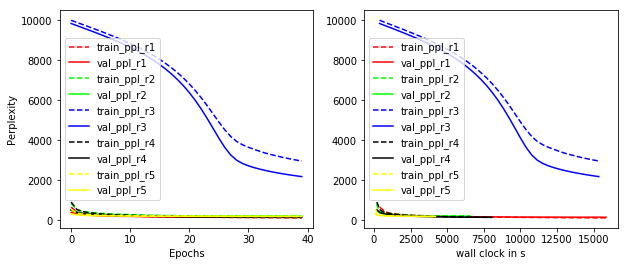

GRU


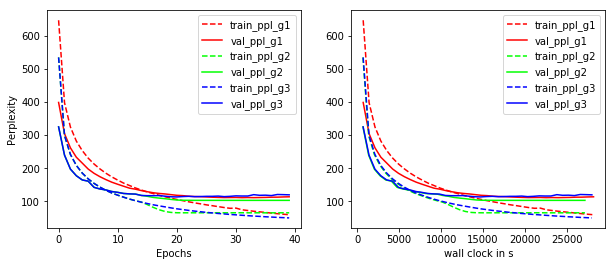

TRANSFORMER


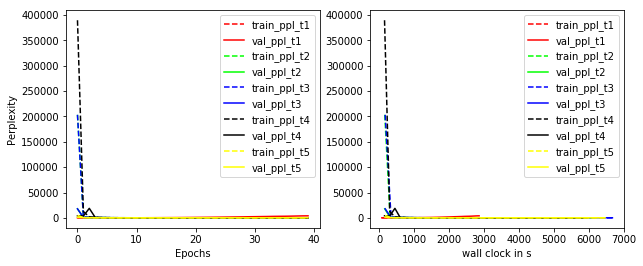

In [19]:
for key in ['RNN', 'GRU', 'TRANSFORMER']:
    print(key)
    pretty_plot_log_list(*by_archi[key])